In [0]:

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline


dataset = pd.read_csv("/content/sample_data/house_prices_data.csv",skiprows=0)
dataset = dataset.drop(["id","date","sqft_living","long" ], axis=1) # відкидаємо ід (ніяк не впливає на результат) та дейт, який не впливає і представляється як стрінг sqft_living - атрибут кореляція якого з іншими такими як sqft_living15, sqft_above... дуже велика тому будемо вважати його за надлишковий
#train_data = dataset
#dataset = [float(str(i)[2:]) for i in train_data["zipcode"]] - відкинув 2 перші цифри але р2 став менший 
#train_data = dataset
dataset = pd.get_dummies(dataset, columns=['zipcode'])#робимо багато "фіктивних" рядків за допомогю котрих зможемо аперувати зіп кодом як треба
#dataset = pd.get_dummies(dataset, columns=['lat'])
sc_X = StandardScaler() 


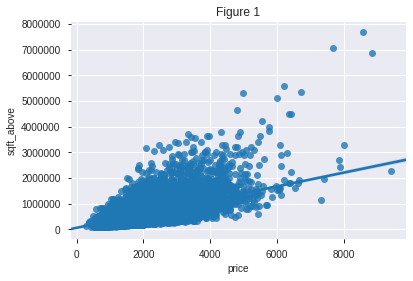

In [0]:
ax = sns.regplot(x=dataset['sqft_above'], y=dataset['price']) # finding outliers, але це не багато,що дало)
plt.ylabel('sqft_above', fontsize= 10)
plt.xlabel('price', fontsize= 10)
plt.show();

In [0]:
g_out = dataset.sort_values(by="price", ascending = False).head(3) # вибираємо 3 максимальні по прайсу точки щоб далі їх дропнути
print(g_out)
# відкидаємо три зайві точки

        price  bedrooms  bathrooms  ...  zipcode_98188  zipcode_98198  zipcode_98199
7252  7700000         6       8.00  ...              0              0              0
3914  7062500         5       4.50  ...              0              0              0
9254  6885000         6       7.75  ...              0              0              0

[3 rows x 86 columns]


In [0]:
dataset.drop([7252,3914,9254 ], inplace = True, axis = 0)
dataset.reset_index(inplace=True)


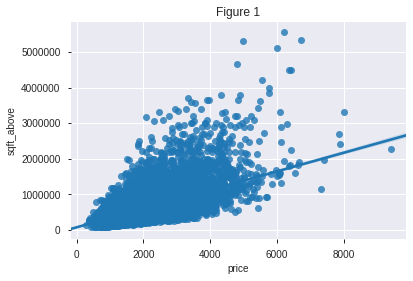

In [0]:
ax = sns.regplot(x=dataset['sqft_above'], y=dataset['price'])
plt.ylabel('sqft_above', fontsize= 10)
plt.xlabel('price', fontsize= 10)
plt.show(); 

In [0]:
def sk():
  X = dataset.drop('price', axis=1)
  numerical_cols = [ # колонки нормалізації
    "bedrooms",
    "bathrooms",
    "sqft_lot",
    "floors",
    "view",
    "condition",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "yr_renovated",
    "sqft_living15",
    "sqft_lot15",
]
  X[numerical_cols] = sc_X.fit_transform(X[numerical_cols]) # normalization
  y = dataset['price']
  from sklearn.model_selection import train_test_split

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1) #0.1  оптимальний варіант і 1 для сіда

  linearRegressor = LinearRegression()
  linearRegressor.fit(X_train, y_train) 
  print('score train', linearRegressor.score(X_train, y_train))
  print('score test', linearRegressor.score(X_test, y_test))
  print("\n")
  y_test_predict = linearRegressor.predict(X_test)
  y_train_predict = linearRegressor.predict(X_train)
  rmsetr = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
  print('RMSE train is {}'.format(rmsetr))
  rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
  print('RMSE test is {}'.format(rmse))
  print("\n")


In [0]:

sk()

score train 0.8142966145289092
score test 0.8420995492496679


RMSE train is 153457.8013448973
RMSE test is 151087.53842224114




In [0]:
dataset.describe()

,index,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,premium,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15,sqft_lot15,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,...,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,21610.000000,2.161000e+04,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,...,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.00000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,10806.555206,5.391614e+05,3.370523,2.114114,1.510461e+04,1.494216,0.007497,0.233919,3.409440,0.075567,1787.477001,291.231606,1971.008006,84.229431,47.560042,1986.254003,12766.666034,0.016752,0.009209,0.012957,0.014623,0.007774,0.023045,0.006525,0.013096,0.004627,0.009024,0.005738,0.008792,0.010828,0.023091,0.003748,0.019065,0.013096,0.014854,0.011846,0.012679,0.005784,0.019991,0.025220,...,0.012402,0.018788,0.021055,0.021657,0.014345,0.005460,0.012633,0.020407,0.016613,0.009162,0.016242,0.004813,0.027857,0.010597,0.015502,0.012309,0.008607,0.005044,0.012448,0.026978,0.015271,0.025590,0.023508,0.008515,0.013420,0.018973,0.016381,0.02286,0.012170,0.015872,0.013327,0.002638,0.020639,0.011754,0.012448,0.011800,0.012124,0.006293,0.012957,0.014669
std,6239.481167,3.586030e+05,0.929716,0.768048,4.142288e+04,0.539961,0.086259,0.765617,0.650764,0.264310,824.487850,441.821309,29.371052,401.286361,0.138570,684.962232,27305.164541,0.128342,0.095521,0.113091,0.120040,0.087830,0.150050,0.080514,0.113688,0.067870,0.094565,0.075534,0.093356,0.103497,0.150197,0.061110,0.136758,0.113688,0.120972,0.108197,0.111889,0.075836,0.139972,0.156796,...,0.110673,0.135777,0.143571,0.145563,0.118912,0.073694,0.111687,0.141392,0.127818,0.095283,0.126410,0.069207,0.164568,0.102397,0.123541,0.110264,0.092377,0.070843,0.110876,0.162024,0.122630,0.157912,0.151513,0.091883,0.115066,0.136432,0.126940,0.14946,0.109648,0.124984,0.114674,0.051292,0.142174,0.107778,0.110876,0.107988,0.109442,0.079083,0.113091,0.120227
min,0.000000,7.500000e+04,0.000000,0.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00

In [0]:
import pandas_profiling

def get_profiling(df, output_name):
    profile = pandas_profiling.ProfileReport(df=df)
    profile.to_file(output_name)

get_profiling(dataset, "train.html")    

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
#my regession : 
def cost(b, k, thetas):
    totalError = 0
    for i in range(0, len(thetas)):
        x = thetas[i, 0]
        y = thetas[i, 1]
        totalError += ((k * x + b)- y) ** 2
    return totalError / double(len(thetas))
 
#сам не зміг доробити і плагіатити не хотів

In [0]:
from os import cpu_count

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import (
    StratifiedKFold, cross_val_score, GridSearchCV, train_test_split
)

# ML models
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import classification_report, f1_score
random_state = 42
n_jobs = max(cpu_count()-1, 1)
def train_log_regression(x, y,
                         random_state,
                         metric='accuracy',
                         n_splits=5, 
                         ):

    # cross-validation iterator
    kf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)

    # create Logistic Regression with default params and fix random_state
    lr = LogisticRegression(random_state=random_state)

    # estimate its accuracy with cross-validation
    scores_lr = cross_val_score(
                                estimator=lr,
                                X=x, 
                                y=y, 
                                scoring=metric,
                                cv=kf,
                                n_jobs=n_jobs
                            ).mean()
    lr.fit(x,y)
    return lr, scores_lr


def get_xy(df, target="premium"):
    return df.drop(target, axis=1), df["premium"]

X, y = get_xy(dataset) 
numerical_cols = [
    "price",
    "bedrooms",
    "bathrooms",
    "sqft_lot",
    "floors",
    "view",
    "condition",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "yr_renovated",
    "sqft_living15",
    "sqft_lot15",
]
X[numerical_cols] = sc_X.fit_transform(X[numerical_cols]) # normalization

X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                    test_size=0.2, 
                                                    random_state=random_state, 
                                                    stratify = y)
base_lr, scores_baseline = train_log_regression(X_train, y_train, random_state=random_state)
print(f"Base logistic regression score on train: {scores_baseline}")
print(f"Base logistic regression score on test: {base_lr.score(X_test, y_test)}")






/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Base logistic regression score on train: 0.9544196861425849
Base logistic regression score on test: 0.9527996298010181
